In [50]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install matplotlib #para poder usar graficas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install statsmodels # para usar modelos estadisticos 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats

In [54]:
dataset = pd.read_csv('chocolate data.txt', index_col=False, sep="\t",header=0)

In [55]:
print(dataset.head())

   weight  cocoa_percent  sugar_percent  milk_percent  customer_happiness
0     185             65             11            24                  47
1     247             44             34            22                  55
2     133             33             21            47                  35
3     145             30             38            32                  34
4     110             22             70             7                  40


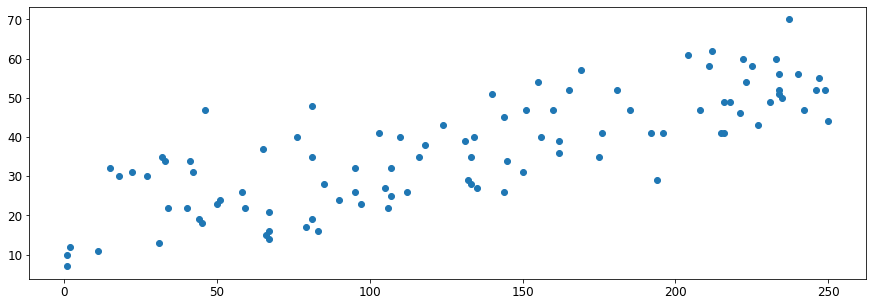

In [56]:
x = dataset['weight']
y = dataset['customer_happiness']

graph.scatter(x,y) #tipo de grafica 
graph.show()

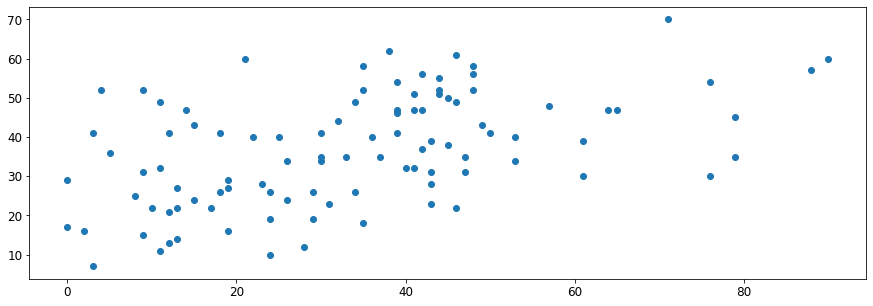

In [57]:
#Analizando los datos de cocoa 
x = dataset['cocoa_percent']
y = dataset['customer_happiness']

graph.scatter(x,y) #tipo de grafica 
graph.show()

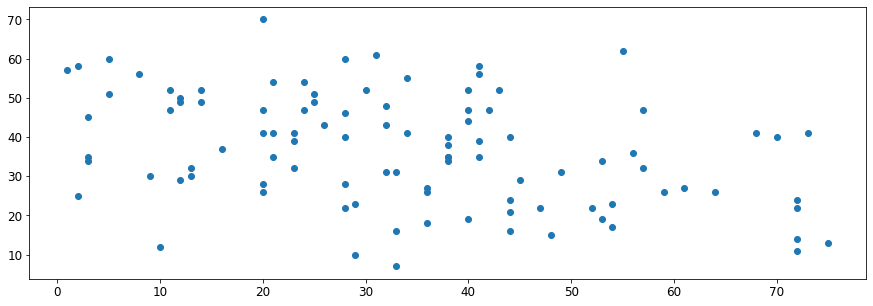

In [58]:
#Analizando los datos de % de Azucar 
x = dataset['sugar_percent']
y = dataset['customer_happiness']

graph.scatter(x,y) #tipo de grafica 
graph.show()

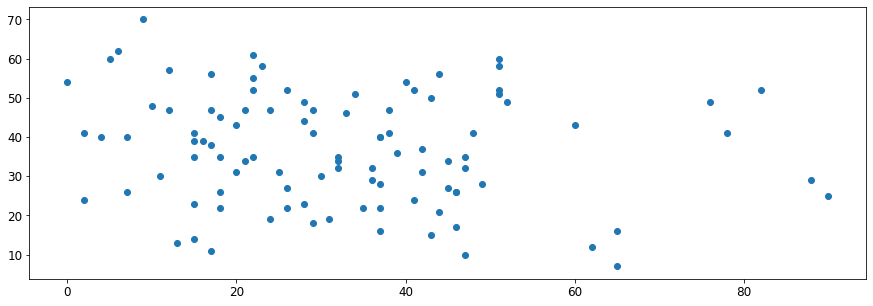

In [59]:
#Analizando los datos de % de Leche
x = dataset['milk_percent']
y = dataset['customer_happiness']

graph.scatter(x,y) #tipo de grafica 
graph.show()

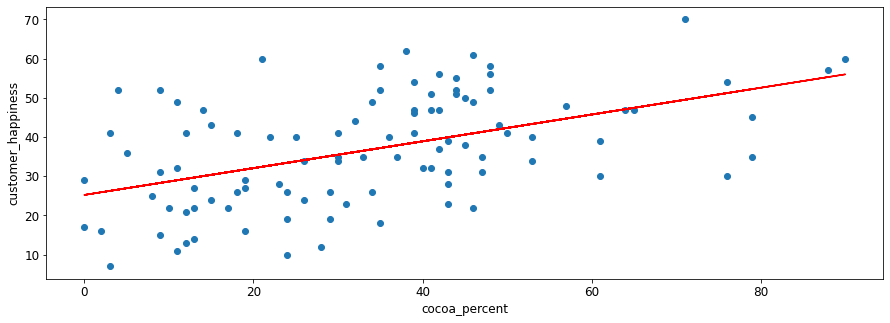

In [60]:
# Define a function to perform a linear regression
def PerformLinearRegression(formula):

    # This performs linear regression
    lm = smf.ols(formula = formula, data = dataset).fit() # con el punto fit se comparan los valores 

    featureName=formula.split(" ")[-1]
    
    # get the data for the x parameter (our feature)
    train_X=dataset[featureName]
    
    # This makes and shows a graph
    intercept=lm.params[0] #b
    slope=lm.params[1] #m
    line = slope * train_X + intercept # funcion de la linea recta, formula de la pendiente 
    graph.plot(train_X, line, '-', c = 'red')
    graph.scatter(train_X, dataset.customer_happiness)
    graph.ylabel('customer_happiness')
    graph.xlabel(featureName)
    graph.show()
    
    # Para la prediccion 
    return lm 
# This performs the linear regression steps listed above
# The text in red is the formula for our regression
PerformLinearRegression('customer_happiness ~ cocoa_percent')

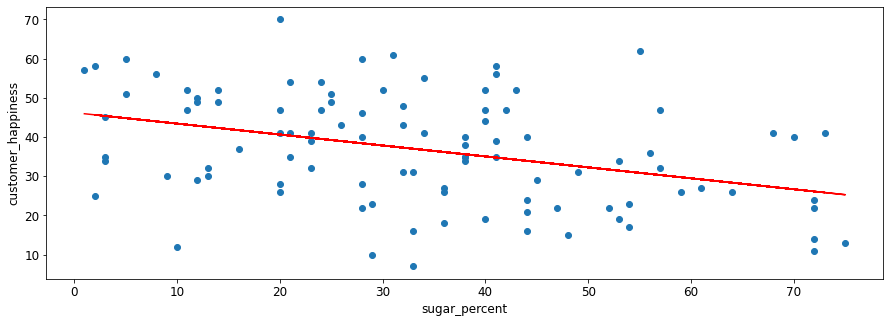

In [61]:
#Ya habiamos visto que en estos datos habia mas dispercion , cada punto representa una observacion para cada barra de chocolate
PerformLinearRegression('customer_happiness ~ sugar_percent')

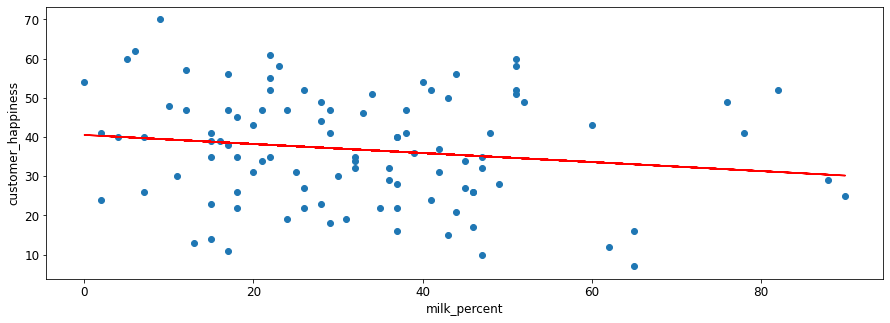

In [62]:
PerformLinearRegression('customer_happiness ~ milk_percent')

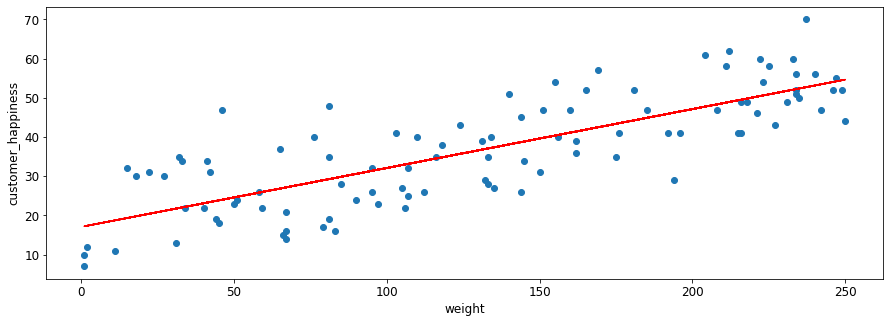

In [63]:
PerformLinearRegression('customer_happiness ~ weight')

In [64]:
##Para hacer una prediccion
##agregamos un return lm a nuestro modelo
##Asigamos lm a la celda que ya esta ajustada a los valores del peso

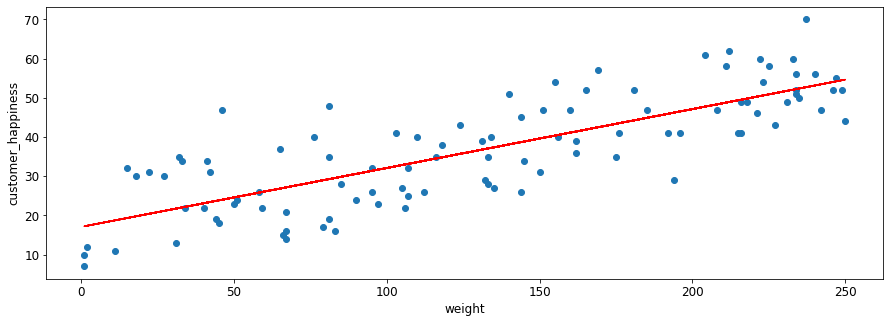

In [65]:
lm = PerformLinearRegression('customer_happiness ~ weight' )

In [66]:
b = lm.params[0]
m = lm.params[1]

y = m* 350 + b 
print(b)

17.096017620806858


In [67]:
#Regresiones lineales



In [68]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
import pandas as pd
import statsmodels.formula.api as smf

# Imports our new data set!
dataset = pd.read_csv('chocolate data multiple linear regression.txt', index_col=False, sep="\t",header=0)

In [69]:
print(dataset.head())

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


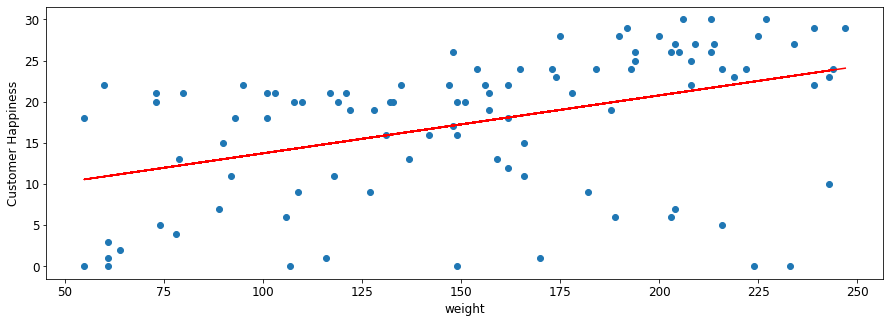

In [70]:
formula = 'customer_happiness ~ weight'
# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

In [71]:
print(lm.rsquared)

0.1887701234022121


In [72]:
###
# IN THE LINE BELOW REPLACE <addCocoaPercentHere> WITH cocoa_percent AND <addCostPercentHere> WITH cost
###
formula = 'customer_happiness ~ weight + cocoa_percent + cost '
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
R²: 0.5554156557713101


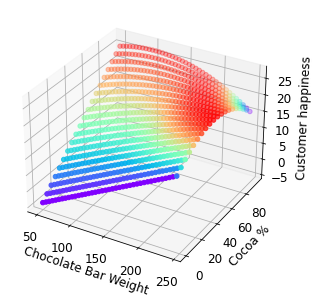

In [73]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def CalculateCustomerHappiness(weight, cocoa_percent):
    # This calculates the customer happiness for a given bar of chocolate
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    
    # First coefficient
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
    
    ### 
    # REPLACE THE <addThirdCoefHere> AND <addFourthCoefHere> BELOW WITH THE THIRD AND FOURTH COEFFICIENTS
    # YOU'LL FIND THEM JUST ABOVE THESE COMMENTS!
    # THE FIRST TWO HAVE ALREADY BEEN COMPLETED FOR YOU
    ###
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness
       
    
# Don't edit this part! This creates our graph.
def Graph3d():
    # This creates a 3D graph of likely customer happiness with different types of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages=range(0,100,5)
    for weight in range(50,250,5):
        happiness=[]
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))

        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer happiness')

    graph.show()
    
Graph3d()

In [74]:
#Polynomial Regression


In [75]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = "DejaVu Sans"
graph.rcParams["font.size"] = "12"
graph.rcParams['image.cmap'] = 'rainbow'
graph.rcParams['axes.facecolor'] = 'white'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('traffic_by_hour.csv')

In [76]:
print(dataset.head())

          00         01         02         03         04        05         06  \
0  43.606554  24.714152   9.302911   3.694417   9.324995  9.837653   7.960157   
1  44.584835  19.604348   9.480832  13.476905  14.465224  6.014083  22.679671   
2  33.208561  29.584181  27.207633  11.243233  12.229805  5.072605   6.111838   
3  35.026655  20.367550  21.445285   7.449592   2.232115  8.104623   9.095805   
4  40.163194  19.936328  18.066480  12.109940  10.878539  9.766027  19.504761   

          07         08         09  ...         14         15         16  \
0  21.292098  27.714126  46.709211  ...  41.714860  38.130357  42.779751   
1  18.192898  28.783762  40.113972  ...  51.364457  35.819379  53.243056   
2  26.176792  35.246483  38.220432  ...  37.738029  42.104013  54.642667   
3  19.499463  37.689567  33.907093  ...  32.354274  36.112366  53.821508   
4  10.313875  28.509128  30.809746  ...  37.509431  54.416484  36.801343   

          17         18         19         20         21

In [77]:
dataset_T = np.transpose(dataset)
print(dataset_T)

            0          1          2          3          4          5
00  43.606554  44.584835  33.208561  35.026655  40.163194  49.169391
01  24.714152  19.604348  29.584181  20.367550  19.936328  24.455188
02   9.302911   9.480832  27.207633  21.445285  18.066480  12.391360
03   3.694417  13.476905  11.243233   7.449592  12.109940  10.705337
04   9.324995  14.465224  12.229805   2.232115  10.878539   6.511395
05   9.837653   6.014083   5.072605   8.104623   9.766027  21.785345
06   7.960157  22.679671   6.111838   9.095805  19.504761  19.257321
07  21.292098  18.192898  26.176792  19.499463  10.313875  23.273782
08  27.714126  28.783762  35.246483  37.689567  28.509128  29.661006
09  46.709211  40.113972  38.220432  33.907093  30.809746  34.608582
10  39.111999  46.149334  30.902951  31.018349  36.326509  38.679585
11  47.428745  43.753611  50.462422  43.379814  45.893941  48.254502
12  43.459394  45.312618  41.865849  40.330625  31.512743  44.585404
13  39.046579  34.654569  43.62873

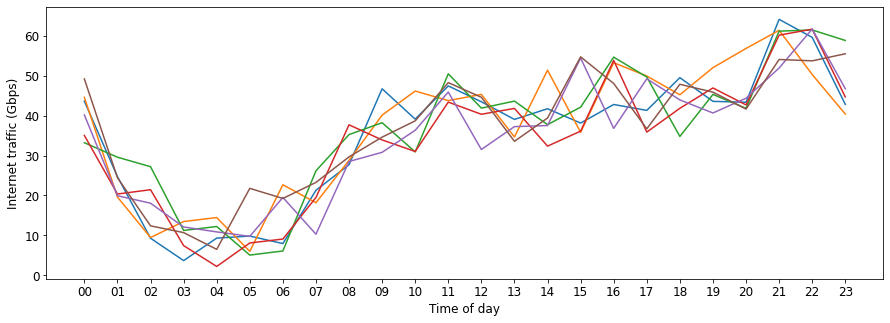

In [78]:
##Let's visualise the data!

###
# REPLACE <addSampleHere> BELOW WITH sample
###
for sample in range(0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[sample])
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

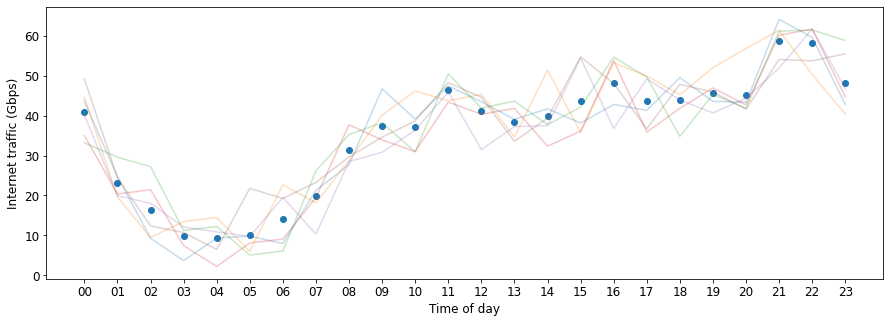

In [79]:
hours = dataset.columns.values

###
# REPLACE THE <replaceWithHour>'s BELOW WITH hour
###
train_Y = [dataset[hour].mean() for hour in hours]  # This will be our outcome we measure (label) - amount of internet traffic
train_X = np.transpose([int(hour) for hour in hours]) # This is our feature - time of day
###

# This makes our graph, don't edit!
graph.scatter(train_X, train_Y)
for sample in range(0,dataset_T.shape[1]):
    graph.plot(hours, dataset_T[sample], alpha=0.25)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

In [80]:
# Polynomials of degree 1 are linear!
# Lets include this one just for comparison

###
# REPLACE THE <replaceWithDegree> BELOW WITH 1
###

poly_1 = np.polyfit(train_X, train_Y,1)

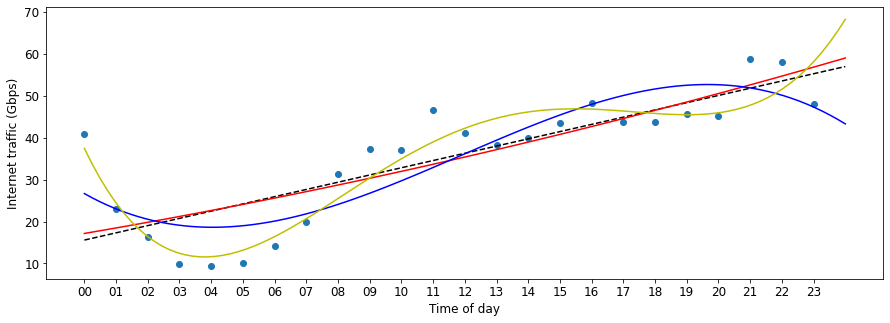

In [81]:
###
# REPLACE THE <replaceWithDegree>'s BELOW WITH 2, 3, AND THEN 4
###
poly_2 = np.polyfit(train_X, train_Y, 2 )
poly_3 = np.polyfit(train_X, train_Y, 3 )
poly_4 = np.polyfit(train_X, train_Y, 4 )
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 2
graph.plot(xp, np.polyval(poly_2, xp), 'r-')
# blue degree 3
graph.plot(xp, np.polyval(poly_3, xp), 'b-') 
# yellow degree 4
graph.plot(xp, np.polyval(poly_4, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

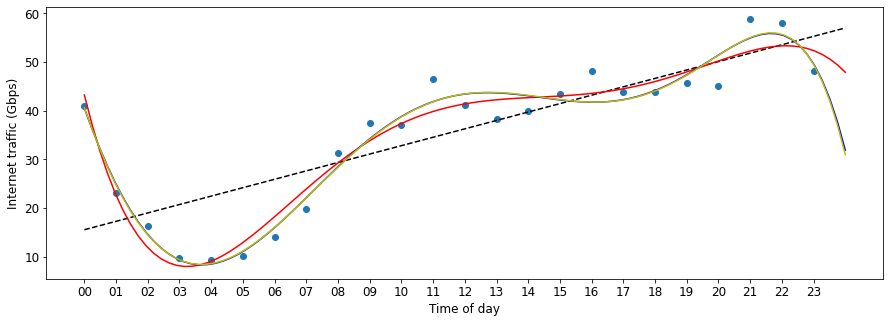

In [82]:
###
# REPLACE THE <replaceWithDegree>'s 5, 6, AND 7
###
poly_5 = np.polyfit(train_X, train_Y, 5)
poly_6 = np.polyfit(train_X, train_Y, 6)
poly_7 = np.polyfit(train_X, train_Y, 7)
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 5
graph.plot(xp, np.polyval(poly_5, xp), 'r-') 
# blue degree 6
graph.plot(xp, np.polyval(poly_6, xp), 'b-') 
# yellow degree 7
graph.plot(xp, np.polyval(poly_7, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

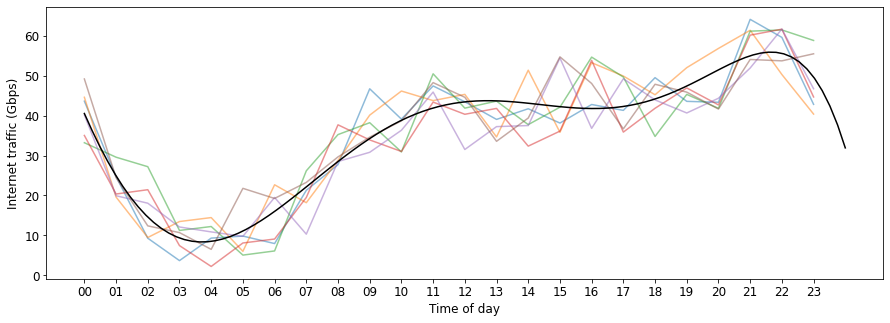

In [83]:
for row in range(0,dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[row], alpha = 0.5)

###
# REPLACE <replaceWithPoly6> BELOW WITH poly_6 - THE POLYNOMIAL WE WISH TO VISUALIZE
###    
graph.plot(xp, np.polyval(poly_6, xp), 'k-')
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

at t=12.5, predicted internet traffic is 43.70388389312041 Gbps


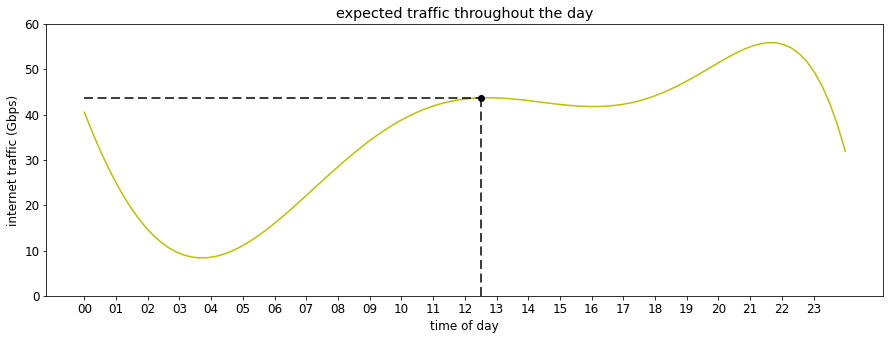

In [84]:
###
# REPLACE <replaceWithTime> BELOW WITH 12.5 (this represents the time 12:30)
###
time = 12.5
###

###
# REPLACE <replaceWithPoly6> BELOW WITH poly_6 SO WE CAN VISUALIZE THE 6TH DEGREE POLYNOMIAL MODEL
###
pred = np.polyval(poly_6, time)
###

print("at t=%s, predicted internet traffic is %s Gbps"%(time,pred))

# Now let's visualise it
graph.plot(xp, np.polyval(poly_6, xp), 'y-')

graph.plot(time, pred, 'ko') # result point
graph.plot(np.linspace(0, time, 2), np.full([2], pred), dashes=[6, 3], color='black') # dashed lines (to y-axis)
graph.plot(np.full([2], time), np.linspace(0, pred, 2), dashes=[6, 3], color='black') # dashed lines (to x-axis)

graph.xticks(train_X, dataset.columns.values)
graph.ylim(0, 60)
graph.title('expected traffic throughout the day')
graph.xlabel('time of day')
graph.ylabel('internet traffic (Gbps)')

graph.show()

In [85]:
#Logistic Regression



In [97]:
# This part sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
import pandas as pd


###
# REPLACE <addFilePath> BELOW WITH 'Data/football data.txt' (INCLUDING THE QUOTES) TO LOAD THE DATA FROM THAT FILE
###
dataset = pd.read_csv('football data.txt', index_col = False, sep = '\t', header = 0)
###


In [98]:
print(dataset.head())

   average_goals_per_match  won_competition
0                 2.422870                1
1                 2.824478                1
2                 0.571688                0
3                 1.055028                0
4                 0.394192                0


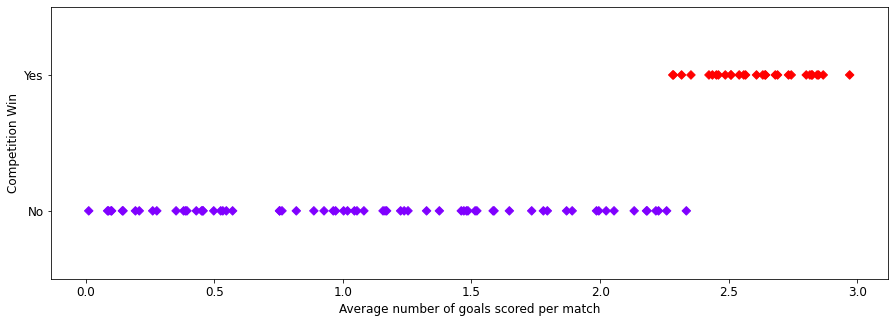

In [101]:
###
# REPLACE <addWonCompetition> BELOW WITH 'won_competition' (INCLUDING THE QUOTES)
###
train_Y = dataset['won_competition']
###

###
# REPLACE <addAverageGoals> BELOW WITH 'average_goals_per_match' (INCLUDING THE QUOTES)
###
train_X = dataset['average_goals_per_match']
###

# The 'won_competition' will be displayed on the vertical axis (y axis)
# The 'average_goals_per_match' will be displayed on the horizontal axis (x axis)

graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')

graph.yticks([0, 1], ['No', 'Yes'])
graph.ylabel("Competition Win")
graph.ylim([-0.5, 1.5])
graph.xlabel("Average number of goals scored per match")

graph.show()

In [105]:
import numpy as np
from sklearn import linear_model
clf = linear_model.LogisticRegression()
# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

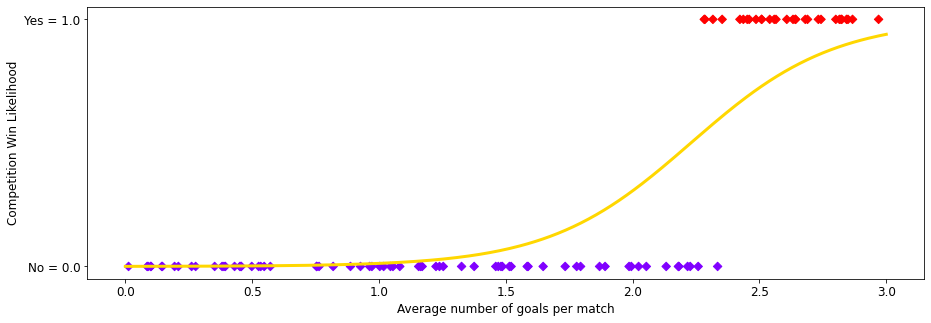

In [106]:
# This makes the graph
# The data points
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
# The curve
graph.plot(X_test, loss, color = 'gold', linewidth = 3)
# Define the y-axis
graph.yticks([0, 1], ['No = 0.0', 'Yes = 1.0'])
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()


Probability of winning this year
30.606829875507678%


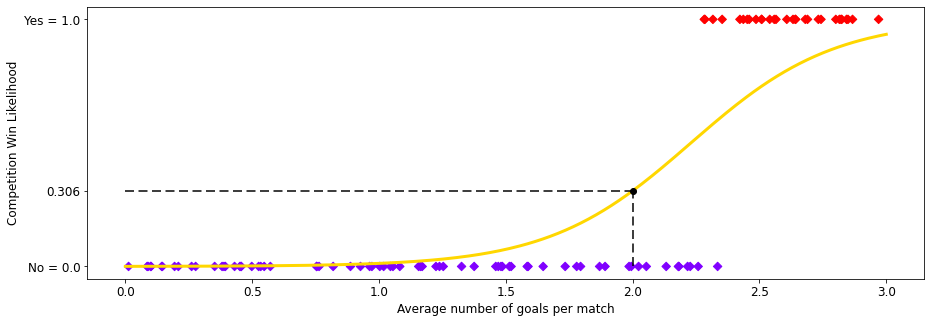

In [107]:
###
# REPLACE <numberOfGoals> BELOW WITH THE NUMBER OF GOALS IN A MATCH THIS YEAR. USE ANY NUMBER FROM 0 TO 3
###
p = 2
###

# Next we're going to use our model again - clf is the name of our model.
# We'll use a method to predict the probability of a positive result
# Use the variable p which we just made in this method.

###
# REPLACE <replaceWithP> BELOW WITH p TO PREDICT USING THIS VALUE
###
probOfWinning = clf.predict_proba([[ p ]])[0][1]
###

# This prints out the result
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()


Probability of winning this year
100.0%


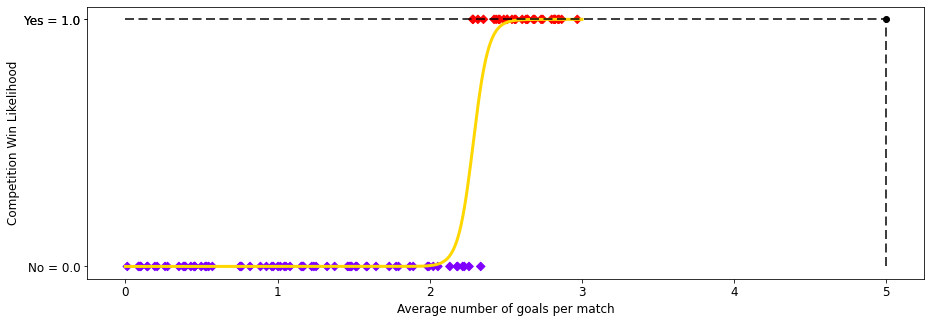

In [108]:
# Let's do that again.
# We will repeat what we did in step 3, but change the decision boundary.

import numpy as np
from sklearn import linear_model

###
# REPLACE THE <numberOfGoals> WITH THE NUMBER OF GOALS YOU WANT TO EVALUATE
###
p = 5
###

# Here we build the new logistic regression model.
# The C=200 is where we change the decision boundary.
###
# REPLACE <buildLinearRegression> BELOW WITH linear_model.LogisticRegression(C=200) TO BUILD A LOGISTIC REGRESSION MODEL
###
clf = linear_model.LogisticRegression(C=200)
###

# This step fits (calculates) the model
# We are using our feature (x - number of goals scored) and our outcome/label (y - won/lost)
clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

# This makes the prediction for your chosen number of goals.
probOfWinning = clf.predict_proba([[p]])[0][1]

# This prints out the result.
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result.
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()